### Underfitting vs. Overfitting

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

#### true_func(X) : 실제 모델의 값 
- 그냥 일반적인 코사인이 그려지니까

In [6]:

def true_func(X):
    return np.cos(1.5*np.pi*X)

In [7]:
np.random.seed(0)

- X는 0부터 1까지 30개의 random 값을 순서대로 sampling 한 데이터입니다.

In [21]:
n_samples = 30



X = np.sort(np.random.rand(n_samples))

- Y는 cosine 기반의 true_func()에서 약간의 Noise 변동값을 더한 값입니다.
- 왜 더했냐면 그냥 완벽한 cosine을 그리면 의미가 퇴색되기 때문입니다.
- random한 값들을 추가

In [23]:
y = true_func(X) + np.random.randn(n_samples)*0.1

#### 위를 코드로 그려보면, 약간의 noise값을 포함한 유사 cosine함수가 만들어진다.

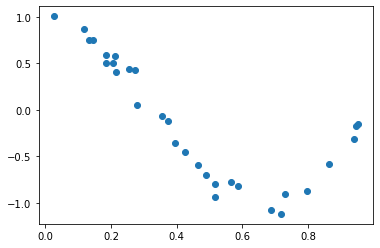

In [25]:
plt.scatter(X,y)

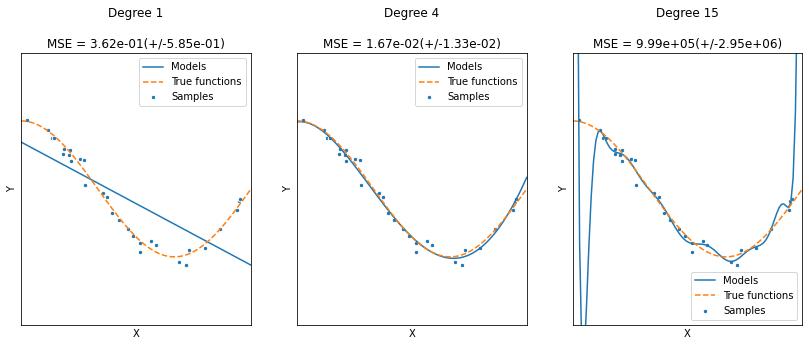

In [30]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]

#다항 회귀의 차수를 1,4,15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    
    ax = plt.subplot(1,len(degrees),i+1)
    plt.setp(ax,xticks=(),yticks=())
    
    
    # 개별 degree 별로 Polynomial을 변환합니다.
    #1,4,15가 각각 들어갈 예정
    polynomial_features = PolynomialFeatures(degree = degrees[i],include_bias=False)
    
    linear_regression = LinearRegression()
    
    pipeline = Pipeline([("polynomial_features!!", polynomial_features),
                       ("linear_regression",linear_regression)])
    
    pipeline.fit(X[:,np.newaxis],y)
    
    # 교차 검증으로 다항회귀를 평가
    scores = cross_val_score(pipeline,X[:,np.newaxis],y,
                            scoring="neg_mean_squared_error",cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    
    #print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i],np.round(coefficients),2))
    #print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i], -1*np.mean(scores)))
    
    #0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 셋에 회귀 예측을 수행하고, 예측 곡선과 실제 곡선을 그려서 비교합니다. 
    
    #테스트 값을 100개씩 채워서 
    X_test = np.linspace(0,1,100)
    #예측값 곡선
    plt.plot(X_test,pipeline.predict(X_test[:,np.newaxis]),label="Models")
    #실제 값 곡선 
    plt.plot(X_test,true_func(X_test),'--',label="True functions")
    plt.scatter(X,y,edgecolor='w',s=20,label="Samples")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.xlim((0,1))
    plt.ylim((-2,2))
    
    plt.legend(loc="best")
    
    plt.title("Degree {}\n\nMSE = {:.2e}(+/-{:.2e})".format(
        degrees[i],-scores.mean(),scores.std()))
    
plt.show()